In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

Coffee = pd.read_csv("Coffee_Chain_Sales .csv")
Coffee = pd.DataFrame(Coffee)

# Create a 3D cube using NumPy
Product_type_values = Coffee['Product_type'].unique()
Market_size_values = Coffee['Market_size'].unique()
State_values = Coffee['State'].unique()

cube = np.zeros((len(Product_type_values), len(Market_size_values), len(State_values) ))

# Fill the cube with sales data
for index, row in Coffee.iterrows():
    if row['Product_type'] in Product_type_values:
        Product_type_idx = np.where(Product_type_values == row['Product_type'])[0][0]
    else:
        continue

    if row['Market_size'] in Market_size_values:
        Market_size_idx = np.where(Market_size_values == row['Market_size'])[0][0]
    else:
        continue

    if row['State'] in State_values:
        Marketing_idx = np.where(State_values == row['State'])[0][0] 
    else:
        continue

    cube[Product_type_idx, Market_size_idx, Marketing_idx] += row['Marketing']

# Cube dimensions and values
print("Product Type Values:", Product_type_values)
print("Market Size Values:", Market_size_values)
print("State Values:", State_values)
print("Cube:")
print(cube)



Product Type Values: ['Herbal Tea' 'Tea' 'Espresso' 'Coffee']
Market Size Values: ['Major Market' 'Small Market']
State Values: ['Colorado' 'Texas' 'Florida' 'California' 'Iowa' 'Connecticut' 'Oklahoma'
 'Nevada' 'Utah' 'New Hampshire' 'Louisiana' 'Oregon' 'Missouri'
 'Wisconsin' 'Washington' 'Massachusetts' 'Illinois' 'New Mexico' 'Ohio'
 'New York']
Cube:
[[[ 650.  186.  314.  664.    0.    0.    0.    0.    0.    0.    0.
      0.    0.    0.    0.  114.  432.    0.   94. 1034.]
  [   0.    0.    0.    0.  710.  292.  664. 1278.  334.   76.  366.
    208.  408.  152.  318.    0.    0.   78.    0.    0.]]

 [[ 380.    0.  110.  440.    0.    0.    0.    0.    0.    0.    0.
      0.    0.    0.    0.   94.  238.    0.  362.  454.]
  [   0.    0.    0.    0.  990.  130.    0. 1470.  376.   26.    0.
    404.  202.  400.  492.    0.    0.    0.    0.    0.]]

 [[ 238.  440.  694. 1558.    0.    0.    0.    0.    0.    0.    0.
      0.    0.    0.    0.  544.  870.    0.  388. 1078.]
 

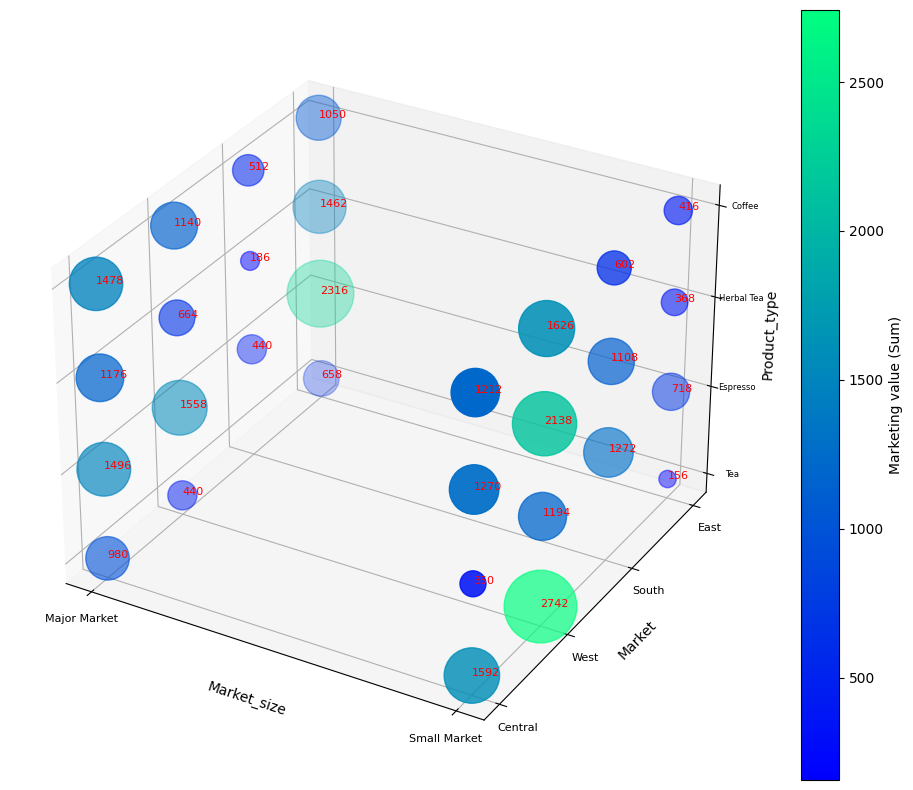

In [4]:
# Calculate the sum for each combination
grouped_data = Coffee.groupby(['Market_size', 'Market', 'Product_type'])['Marketing'].sum().reset_index()

# Convert string data to numerical values
market_sizes = list(set(grouped_data['Market_size']))
markets = list(set(grouped_data['Market']))
product_types = list(set(grouped_data['Product_type']))

data_numerical = [
    [market_sizes.index(row['Market_size']), markets.index(row['Market']), product_types.index(row['Product_type']), row['Marketing']]
    for _, row in grouped_data.iterrows()
]

data = list(zip(*data_numerical))

# Set a larger figure size
fig = pyplot.figure(figsize = (12,10))
ax = fig.add_subplot(111, projection = '3d')

# Plot the scatter plot
scatter = ax.scatter(data[0], data[1], data[2], c = data[3], cmap = 'winter', s = data[3])

# Add numerical labels at each point
for i, txt in enumerate(data[3]):
    ax.text(data[0][i], data[1][i], data[2][i], f'{txt}', fontsize = 8, color = 'red') 

# Set axis labels
ax.set_xlabel('Market_size')
ax.set_ylabel('Market')
ax.set_zlabel('Product_type')

# Set tick labels and their font size
ax.set_xticks(range(len(market_sizes)))
ax.set_xticklabels(market_sizes, fontsize = 8)
ax.set_yticks(range(len(markets)))
ax.set_yticklabels(markets, fontsize = 8)
ax.set_zticks(range(len(product_types)))
ax.set_zticklabels(product_types, fontsize = 6)

# Set colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Marketing value (Sum)')

pyplot.show()
